In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HousingPrices-Amsterdam-August-2021.csv')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [4]:
df

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...
919,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  924 non-null    object 
 1   Zip      924 non-null    object 
 2   Price    920 non-null    float64
 3   Area     924 non-null    int64  
 4   Room     924 non-null    int64  
 5   Lon      924 non-null    float64
 6   Lat      924 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 50.7+ KB


In [6]:
df[df['Price'].isnull()]

,Address,Zip,Price,Area,Room,Lon,Lat
73,"Falckstraat 47 A, Amsterdam",1017 VV,NaN,147,3,4.897454,52.360707
321,"Haarlemmerweg 705, Amsterdam",1067 HP,NaN,366,12,4.787874,52.383877
610,"Zeeburgerkade 760, Amsterdam",1019 HT,NaN,107,3,4.945022,52.369244
727,"Suikerplein 16, Amsterdam",1013 CK,NaN,81,3,4.880976,52.389623


We can just drop these rows. I would store these rows in a seperate dataframe before dropping so I can come back to these and predict their Prices later

In [7]:
df_no_price = df[df['Price'].isnull()].copy()
df.dropna(inplace=True)

In [8]:
df.describe(include='all')

,Address,Zip,Price,Area,Room,Lon,Lat
count,920,920,9.200000e+02,920.000000,920.00000,920.000000,920.000000
unique,915,830,NaN,NaN,NaN,NaN,NaN
top,"Quashibastraat, Amsterdam",1075 XR,NaN,NaN,NaN,NaN,NaN
freq,2,5,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.220654e+05,95.607609,3.56413,4.888652,52.363271
std,NaN,NaN,5.389942e+05,56.849699,1.57103,0.053118,0.024054
min,NaN,NaN,1.750000e+05,21.000000,1.00000,4.644819,52.291519
25%,NaN,NaN,3.500000e+05,60.000000,3.00000,4.855834,52.351925
50%,NaN,NaN,4.670000e+05,83.000000,3.00000,4.886818,52.364499
75%,NaN,NaN,7.000000e+05,113.000000,4.00000,4.922337,52.377545


In [9]:
df[df['Address'].duplicated(keep=False)].sort_values(by='Address')

,Address,Zip,Price,Area,Room,Lon,Lat
184,"Huidekoperstraat 24 F, Amsterdam",1017 ZM,2475000.0,183,4,4.897473,52.358943
287,"Huidekoperstraat 24 F, Amsterdam",1017 ZM,2475000.0,183,3,4.897473,52.358943
789,"Nieuwevaartweg, Amsterdam",1019 AL,1325000.0,162,4,4.954376,52.367982
884,"Nieuwevaartweg, Amsterdam",1019 AL,650000.0,87,4,4.954376,52.367982
908,"Quashibastraat, Amsterdam",1087 VS,348738.0,79,4,5.016555,52.350513
909,"Quashibastraat, Amsterdam",1087 VS,348738.0,79,4,5.016555,52.350513
918,"Ringdijk, Amsterdam",1097 AE,295000.0,41,1,4.927757,52.354173
919,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
243,"Uilengouw 2, Amsterdam",1027 EZ,899000.0,258,1,4.967897,52.410672
320,"Uilengouw 2, Amsterdam",1027 EZ,1249000.0,258,5,4.967897,52.410672


Only Quashibastraat is an exact duplicate. Rest have some differences which could be due to several reasons.

In [10]:
df.drop(909,inplace=True)

In [11]:
len(df['Zip'].unique())

830

<AxesSubplot:xlabel='Price', ylabel='Count'>

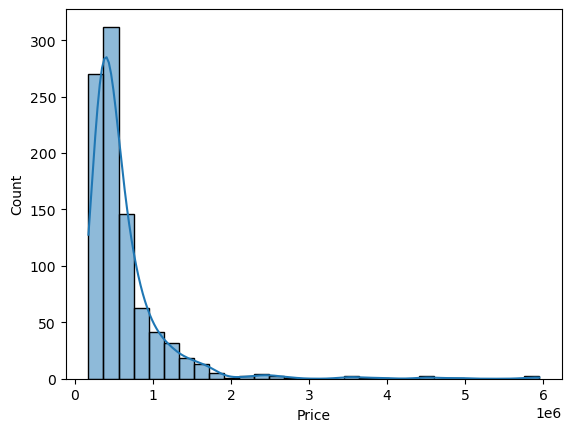

In [12]:
sns.histplot(df['Price'],bins=30,kde=True)

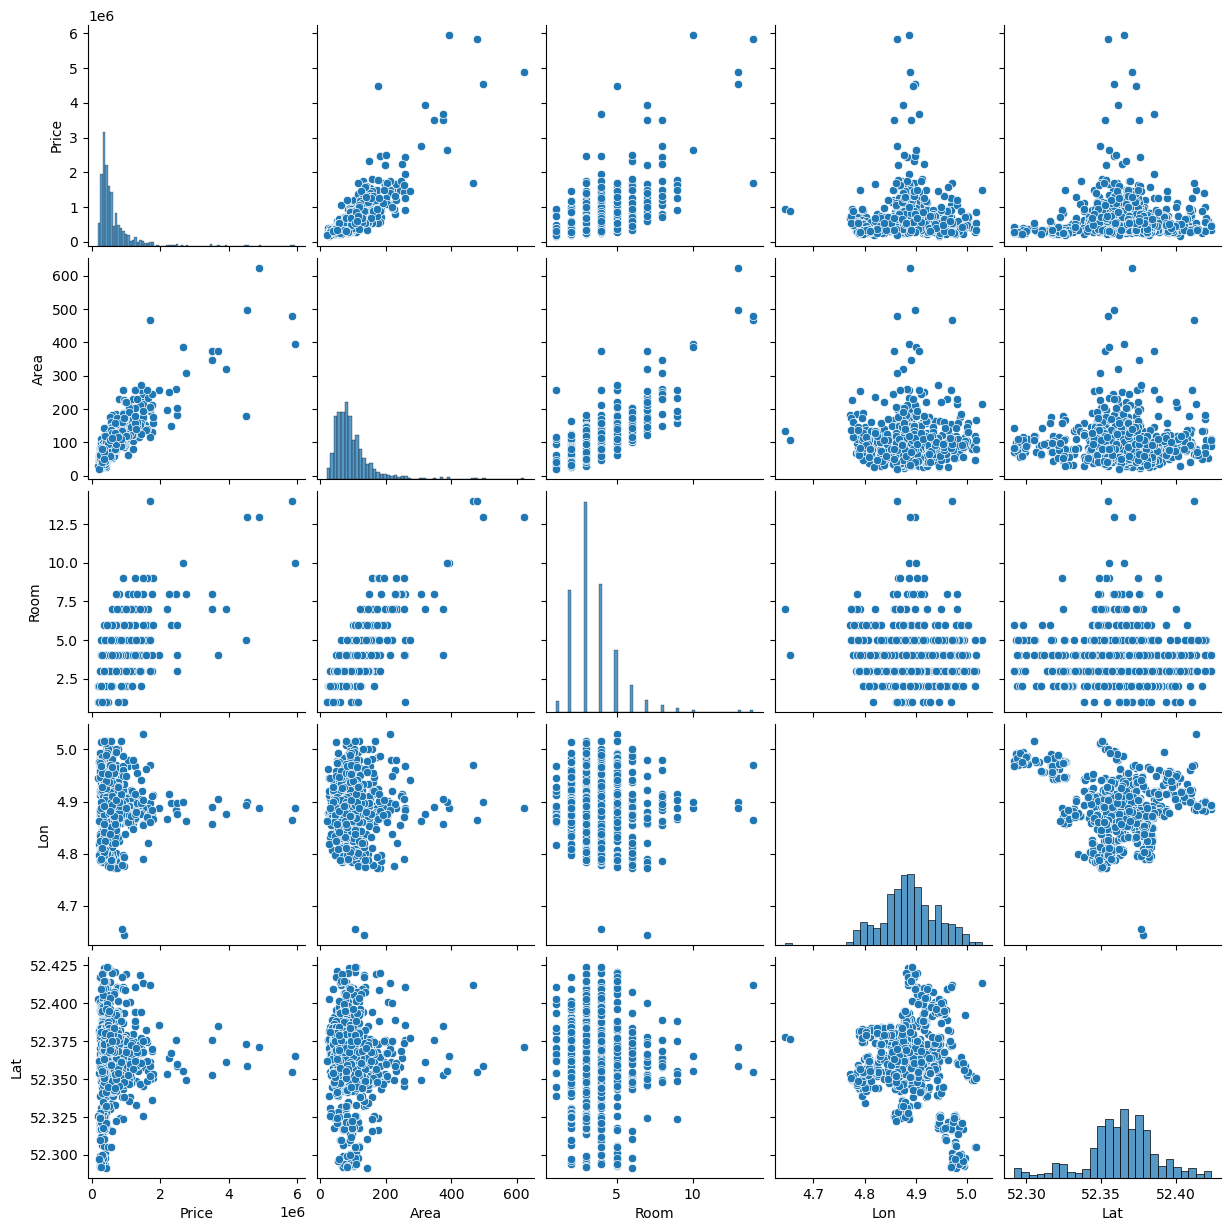

In [13]:
sns.pairplot(df)

<AxesSubplot:xlabel='Room', ylabel='count'>

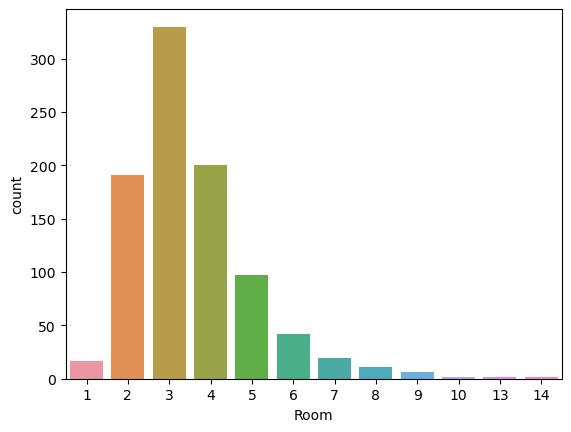

In [14]:
sns.countplot(x=df['Room'])

<AxesSubplot:>

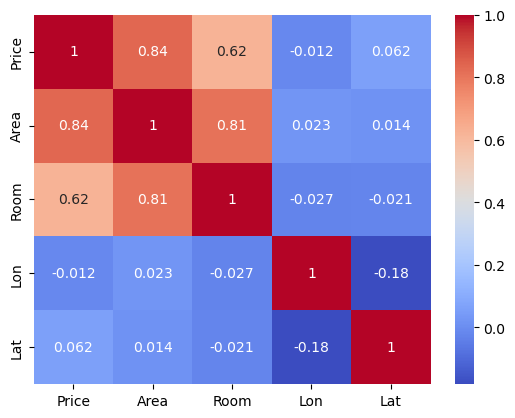

In [15]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

We can drop the Address Column since Latitude and Longitude can give numerical representation of the Adress.

In [16]:
df.drop(['Address'],axis=1,inplace=True)

We can also drop the last two letters in the Zip which defines the for precise location of the house. Just the 4 letter zip code is fine

In [17]:
df['Zip'] = df['Zip'].str.split(' ',expand=True)[0].astype('int64')

In [18]:
df

,Zip,Price,Area,Room,Lon,Lat
0,1091,685000.0,64,3,4.907736,52.356157
1,1059,475000.0,60,3,4.850476,52.348586
2,1097,850000.0,109,4,4.944774,52.343782
3,1060,580000.0,128,6,4.789928,52.343712
4,1036,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...
919,1097,750000.0,117,1,4.927757,52.354173
920,1033,350000.0,72,3,4.890612,52.414587
921,1058,350000.0,51,3,4.856935,52.363256
922,1095,599000.0,113,4,4.965731,52.375268


Now lets get some description of the Dataset once again after it is modified

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919 entries, 0 to 923
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zip     919 non-null    int64  
 1   Price   919 non-null    float64
 2   Area    919 non-null    int64  
 3   Room    919 non-null    int64  
 4   Lon     919 non-null    float64
 5   Lat     919 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 82.5 KB


In [20]:
df.describe(include='all')

,Zip,Price,Area,Room,Lon,Lat
count,919.000000,9.190000e+02,919.000000,919.000000,919.000000,919.000000
mean,1056.830250,6.223628e+05,95.625680,3.563656,4.888513,52.363285
std,28.870448,5.392121e+05,56.878011,1.571820,0.052979,0.024064
min,1011.000000,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,1027.000000,3.500000e+05,60.000000,3.000000,4.855834,52.352030
50%,1059.000000,4.690000e+05,83.000000,3.000000,4.886718,52.364626
75%,1077.000000,7.000000e+05,113.000000,4.000000,4.922213,52.377547
max,1109.000000,5.950000e+06,623.000000,14.000000,5.029122,52.423805


In [21]:
df['Zip'].value_counts()

1017    31
1055    29
1068    26
1053    26
1018    25
        ..
1023     4
1108     3
1028     2
1109     2
1022     1
Name: Zip, Length: 70, dtype: int64

<AxesSubplot:>

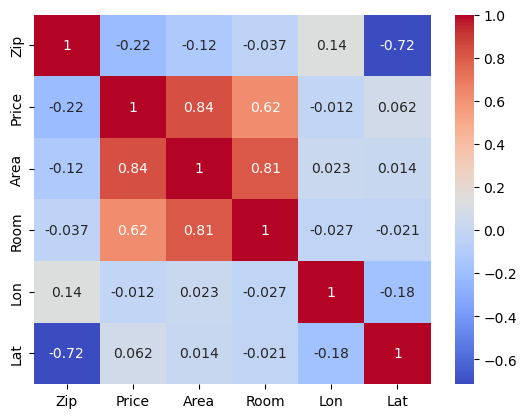

In [22]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

Latitude and Longitute does not affect Price. We can drop Those as well

In [23]:
df.drop(['Lon','Lat'],axis=1,inplace=True)

In [24]:
# Splitting Input and output features
X = df.drop('Price',axis=1)
y = df['Price']

In [25]:
X

,Zip,Area,Room
0,1091,64,3
1,1059,60,3
2,1097,109,4
3,1060,128,6
4,1036,138,5
...,...,...,...
919,1097,117,1
920,1033,72,3
921,1058,51,3
922,1095,113,4


In [26]:
y

0      685000.0
1      475000.0
2      850000.0
3      580000.0
4      720000.0
         ...   
919    750000.0
920    350000.0
921    350000.0
922    599000.0
923    300000.0
Name: Price, Length: 919, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  GridSearchCV
import xgboost

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [29]:
len(X_train)

735

In [30]:
len(X_test)

184

<AxesSubplot:xlabel='Price', ylabel='Count'>

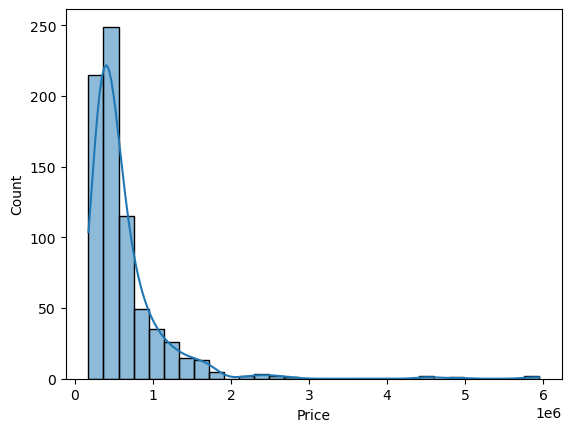

In [31]:
sns.histplot(y_train,bins=30,kde=True)

<AxesSubplot:xlabel='Price', ylabel='Count'>

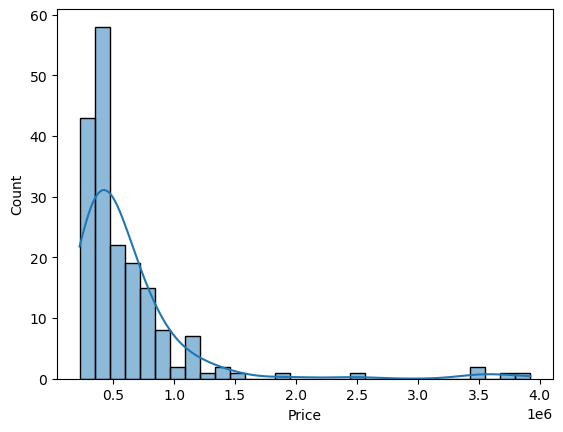

In [32]:
sns.histplot(y_test,bins=30,kde=True)

In [33]:
model1 = RandomForestRegressor()

In [34]:
model1.fit(X_train,y_train)

RandomForestRegressor()

In [35]:
y_pred1 = model1.predict(X_test)

In [36]:
print(f'R-Squared: {r2_score(y_test,y_pred1)}')
print(f'Mean-Absolute Error: {mean_absolute_error(y_test,y_pred1)}')
print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred1)}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred1))}')

R-Squared: 0.8177750777291692
Mean-Absolute Error: 101249.92108695653
Mean Squared Error: 54755503033.93913
Root Mean Squared Error: 233998.9381042981


In [37]:
model2 = xgboost.XGBRegressor()

In [38]:
model2.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred2 = model2.predict(X_test)

In [40]:
print(f'R-Squared: {r2_score(y_test,y_pred2)}')
print(f'Mean-Absolute Error: {mean_absolute_error(y_test,y_pred2)}')
print(f'Mean Squared Error: {mean_squared_error(y_test,y_pred2)}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test,y_pred2))}')

R-Squared: 0.7679606783395518
Mean-Absolute Error: 112848.48938519022
Mean Squared Error: 69723886408.29532
Root Mean Squared Error: 264052.8098852488


Random Forrest is slightly better

In [42]:
import pickle

pickle_out = open("random_forest_model.pkl","wb")
pickle.dump(model1, pickle_out)
pickle_out.close()